In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

import numpy as np

In [2]:
# step 1, load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../data/MNIST_data', one_hot=True)
print(mnist.train.labels.shape)
print(mnist.train.images.shape)
print(mnist.test.labels.shape)
print(mnist.test.images.shape)

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 10)
(55000, 784)
(10000, 10)
(10000, 784)


In [3]:
def weights_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))
    
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
    
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

X_input = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 10])
X = tf.reshape(X_input, shape=[-1, 28, 28, 1])

# First layer
W_conv1 = weights_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(X, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Second layer
W_conv2 = weights_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# flatten
h_pool2_flatten = tf.reshape(h_pool2, [-1, 7*7*64])

# fc1
W_fc1 = weights_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flatten, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_dropout = tf.nn.dropout(h_fc1, keep_prob)

# fc2
W_fc2 = weights_variable([1024, 10])
b_fc2 = bias_variable([10])
y_pred = tf.nn.softmax(tf.matmul(h_fc1_dropout, W_fc2) + b_fc2)


In [8]:
import time

cross_entropy = -tf.reduce_sum(y_input*tf.log(y_pred))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

cross_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_input, 1))
accuracy = tf.reduce_mean(tf.cast(cross_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

for step in range(5000):
    time0 = time.time()
    X_batch, y_batch = mnist.train.next_batch(batch_size=100)
    cost, acc, _ = sess.run([cross_entropy, accuracy, train_step], feed_dict={X_input: X_batch, y_input: y_batch, keep_prob: 0.5})
    if (step + 1) % 500 == 0:
        test_acc = 0.0
        test_cost = 0.0
        N = 100
        for i in range(N):
            X_test_batch, y_test_batch = mnist.test.next_batch(batch_size=100)
            _cost, _acc = sess.run([cross_entropy, accuracy], feed_dict={X_input: X_test_batch, y_input: y_test_batch, keep_prob: 1.0})
            test_cost += _cost
            test_acc += _acc
        print('step {}, train cost {:.6f} train acc {:.6f} test cost {:.6f} test acc {:.6f} pass {}s'.format(step, cost, acc, test_cost/N, test_acc/N, time.time() - time0))

step 499, train cost 24.202824 train acc 0.920000 test cost 15.703499 test acc 0.952100 pass 0.22132015228271484s
step 999, train cost 20.862913 train acc 0.950000 test cost 9.806249 test acc 0.970800 pass 0.22216153144836426s
step 1499, train cost 17.320311 train acc 0.950000 test cost 7.253902 test acc 0.977000 pass 0.19803833961486816s
step 1999, train cost 11.316448 train acc 0.940000 test cost 6.057700 test acc 0.981000 pass 0.21344375610351562s
step 2499, train cost 10.194584 train acc 0.980000 test cost 5.150349 test acc 0.982700 pass 0.20212388038635254s
step 2999, train cost 6.524717 train acc 0.970000 test cost 4.541613 test acc 0.984800 pass 0.21729278564453125s
step 3499, train cost 8.908295 train acc 0.970000 test cost 4.218589 test acc 0.985400 pass 0.22370290756225586s
step 3999, train cost 4.473552 train acc 0.980000 test cost 3.915411 test acc 0.986900 pass 0.2131338119506836s
step 4499, train cost 2.538017 train acc 0.980000 test cost 3.606993 test acc 0.987900 pass 0

In [13]:
img1 = mnist.train.images[0]
label1 = mnist.train.labels[0]
print('lable1', label1)
print('img1.shape', img1.shape)
img1 = img1.reshape([28, 28])

lable1 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
img1.shape (784,)


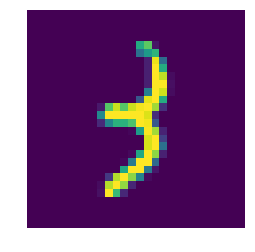

In [14]:
import matplotlib.pyplot as plt

plt.imshow(img1)
plt.axis('off')
plt.show()

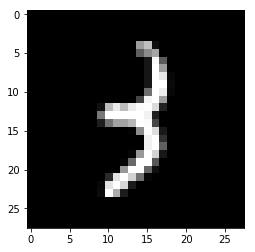

In [15]:
plt.imshow(img1, cmap='gray')
plt.show()

In [19]:
X_img = img1.reshape([-1, 784])
y_label = label1.reshape([-1, 10])
result = sess.run([h_conv1], feed_dict={X_input: X_img})[0]
print(result.shape)

(1, 28, 28, 32)


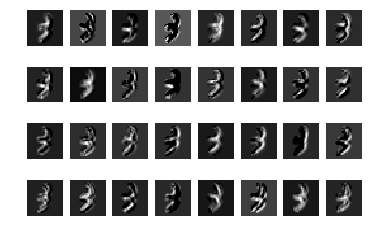

In [24]:
for i in range(32):
    show_img = result[:,:,:,i]
    show_img = show_img.reshape([28, 28])
    plt.subplot(4, 8, i + 1)
    plt.imshow(show_img, cmap='gray')
    plt.axis('off')
plt.show()